<h3 style="text-align: center;"> <strong> UNIVERSIDAD TECNOLÓGICA DE PANAMÁ </strong></h3>
<h3 style="text-align: center;">FACULTAD DE INGENIERÍA DE SISTEMAS COMPUTACIONALES</h3>
<h3 style="text-align: center;">MAESTRÍA EN ANALÍTICA DE DATOS</h3>
    
<h1 style="text-align: center;"><strong>-----LABORATORIO N°3:  APRENDIZAJE SUPERVISADO 2-----</strong></h1>
<h3 style="text-align: center;">MACHINE LEARNING Y ANALITICA PRESCRIPTIVA - S108</h3>




|  **FACILITADOR** | Dr. José Carlos Rangel Ortiz          |
|-----------------|---------------------------------------|
| **MÓDULO 2**    | Clasificadores  |
|  **UNIDAD 1**    | Algoritmos de Aprendizaje Supervisado |
    

| **NOMBRE DEL ESTUDIANTE:** | EVARISTO DE GRACIA__8-788-1186 |
|----------------------------|-----------------------------------------------------------------------------------------|

# Introducción 


El Aprendizaje Automático(ML) y la Ciencia de Datos se entrelazan como dos piezas de un rompecabezas, formando una poderosa herramienta para la extracción de conocimiento a partir de datos. El ML enriquece el campo de la Ciencia de Datos, impulsando el análisis y la toma de decisiones informadas.

El ML dota a los científicos de datos de algoritmos inteligentes que pueden aprender de grandes conjuntos de datos sin necesidad de una programación explícita. Estos algoritmos son capaces de identificar patrones complejos, realizar predicciones y tomar decisiones autónomas, lo que permite a los científicos de datos:

- Automatizar tareas tediosas
- Descubrir patrones ocultos
- Realizar predicciones precisas
- Realizar predicciones precisas

**Casos de uso del Aprendizaje Automático en la Ciencia de Datos**

- Análisis de fraude
- Recomendación de productos
- Detección de anomalías
- Segmentación de clientes
- Reconocimiento de imágenes

En este laboratorio se utilizarán los algoritmos de Support Vector Machines y de Redes Neuronales (Perceptron Multicapa). Estos algoritmos forman parte del grupo de los algoritmos supervisados y pueden ser utilizados en enfoques de regresión y clasificación. 
En el caso del desarrollo de Redes Neuronales, se estarán utilizando códigos de SciKitLearn así como también TensorFlow, haciendo enfásis en las diferencias de estos al momento de obtener nuestros resultados. El algoritmo de Regresión Lineal de SciKitLearn calcula estos parámetros que representan los datos de entrenamiento. Estas librerías aportan diferentes niveles de control sobre los paramétros y opciones del algoritmo. 



<div class="alert alert-success", role="alert">
    <h1 style="font-size: 1.5em;">Parte 1 </h1>
    <h2 style="font-size: 1.5em; "><strong>Support Vectors Machines</strong></h2>
</div>


## Importar Librerias

In [245]:
!pip install palmerpenguins


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [246]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt 

from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

import sklearn.metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

import palmerpenguins
from palmerpenguins import load_penguins


<div class="alert alert-info", role="success">
    <h1 style="font-size: 2em;">Entrene un modelo de SVM para la predicción de la Especie del Pinguino usando solo los datos numéricos presentes en el dataset. </h1>
</div>

**obs.** Retirar también la variable 'year' del dataset

## **[1]** Cargue el dataset y elimine los NaNs si existen

In [247]:
penguins_file = load_penguins()
penguins_file.head()



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [248]:
penguins_clean_df = penguins_file.dropna().drop(columns=['year'])
print(f"Filas originales: {len(penguins_file)}")
print(f"Filas después de eliminar nulos(NaN): {len(penguins_clean_df)}")

Filas originales: 344
Filas después de eliminar nulos(NaN): 333


## **[2]** Genere el dataset solo con las variables numéricas (función **.drop()**), separe X & Y para el entrenamiento

In [249]:
penguins_clean_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [250]:
penguins_no = penguins_clean_df.drop(columns=penguins_clean_df.select_dtypes(exclude=['number']).columns)
print(penguins_no.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0            39.1           18.7              181.0       3750.0
1            39.5           17.4              186.0       3800.0
2            40.3           18.0              195.0       3250.0
4            36.7           19.3              193.0       3450.0
5            39.3           20.6              190.0       3650.0


In [251]:
# X: Descriptores 
X = penguins_no

# y: objetivo 
y = penguins_clean_df['species']

print("Forma de X:", X.shape)  
print("Forma de y:", y.shape)  

Forma de X: (333, 4)
Forma de y: (333,)


In [252]:
# Dividir en 80% train y 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [253]:
penguins_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


## **[3]** Aplique el Escalado a los datos

In [254]:
scaler = StandardScaler()
penguins_no = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
X_train[penguins_no] = scaler.fit_transform(X_train[penguins_no])
X_test[penguins_no] = scaler.transform(X_test[penguins_no])

print(X_train.head())

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
232        0.928042      -1.308932           0.743575       4625.0
84        -1.253118       0.370128          -0.730905       3350.0
306       -0.587679      -0.240439          -1.011758       3200.0
22        -1.511899       1.082456          -0.871332       3800.0
29        -0.661617       0.929814          -1.503252       3950.0


## **[4]** Entrene el modelo de predicción mediante SVM

In [255]:
svm = SVC(kernel="poly", C=1, gamma="scale")  
svm.fit(X_train, y_train)
output = svm.predict(X_test)

## **[5]** Calcule el *score* de su modelo

In [256]:
test_score = svm.score(X_test, y_test)

print("Test Accuracy:", test_score)

Test Accuracy: 0.6716417910447762


## **[6]** Imprima las predicciones de categorías para las instancias usadas para el entrenamiento

In [257]:
y_train_pred = svm.predict(X_train)

print("Predicciones de categorias del entrenamiento:")
print(y_train_pred)

Predicciones de categorias del entrenamiento:
['Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo'
 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo'
 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo'
 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie'
 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo'
 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo'
 'Gentoo' 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie'
 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie'
 'Gen

In [258]:
output_train = pd.DataFrame({
    "Real": y_train,
    "Predicho": y_train_pred
})

print(output_train.head(20))  

          Real Predicho
232     Gentoo   Gentoo
84      Adelie   Adelie
306  Chinstrap   Adelie
22      Adelie   Adelie
29      Adelie   Adelie
259     Gentoo   Gentoo
336  Chinstrap   Adelie
246     Gentoo   Gentoo
184     Gentoo   Gentoo
88      Adelie   Adelie
117     Adelie   Adelie
149     Adelie   Adelie
248     Gentoo   Gentoo
122     Adelie   Adelie
146     Adelie   Adelie
183     Gentoo   Gentoo
96      Adelie   Adelie
324  Chinstrap   Adelie
267     Gentoo   Gentoo
36      Adelie   Adelie


## **[7]** Genere la matriz de confusión del modelo

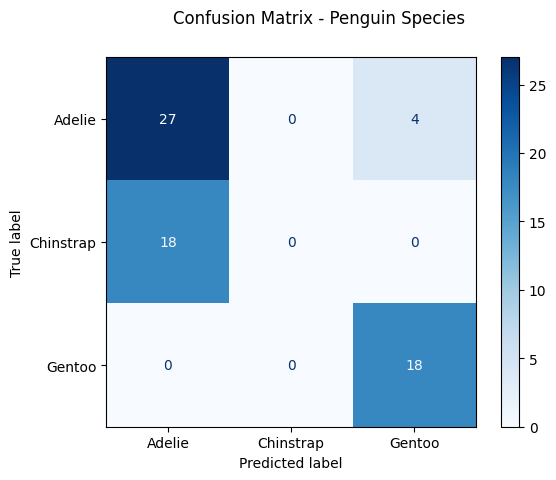

In [259]:
categorias = ["Adelie", "Chinstrap", "Gentoo"]

fig = ConfusionMatrixDisplay.from_estimator(
    svm,              
    X_test,           # features from test set
    y_test,           # true labels from test set
    display_labels=categorias,
    cmap="Blues"
)

fig.figure_.suptitle("Confusion Matrix - Penguin Species")
plt.show()

<div class="alert alert-info", role="success">
    <h1 style="font-size: 2em;">Convierta las variables categóricas Sex e Isla a un formato numérico y entrene un nuevo clasificador para la especie del pinguino </h1>
</div>


## **[8]** Cargue el Dataset y separe las secuencias X & Y para el entrenamiento.

In [260]:
penguins_file2 = penguins_clean_df.copy()

penguins_file2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [261]:
# Separación secuencia X
X_penguins2 = penguins_file2.drop(['species'],  axis='columns')
X_penguins2


,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,male
1,Torgersen,39.5,17.4,186.0,3800.0,female
2,Torgersen,40.3,18.0,195.0,3250.0,female
4,Torgersen,36.7,19.3,193.0,3450.0,female
5,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...
339,Dream,55.8,19.8,207.0,4000.0,male
340,Dream,43.5,18.1,202.0,3400.0,female
341,Dream,49.6,18.2,193.0,3775.0,male
342,Dream,50.8,19.0,210.0,4100.0,male


In [262]:
# Separación secuencia y
y_penguins2 = penguins_file2.species
y_penguins2

0         Adelie
1         Adelie
2         Adelie
4         Adelie
5         Adelie
         ...    
339    Chinstrap
340    Chinstrap
341    Chinstrap
342    Chinstrap
343    Chinstrap
Name: species, Length: 333, dtype: object

## **[9]** Aplique el LabelEncoder

In [263]:
label_encoder_island = LabelEncoder()
label_encoder_sex = LabelEncoder()


X_penguins2_encoded = X_penguins2.copy()

X_penguins2_encoded['island_encoded'] = label_encoder_island.fit_transform(X_penguins2['island'])
X_penguins2_encoded['sex_encoded'] = label_encoder_sex.fit_transform(X_penguins2['sex'])

X_penguins2_encoded.describe(include='all')

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_encoded,sex_encoded
count,333,333.000000,333.000000,333.000000,333.000000,333,333.000000,333.000000
unique,3,NaN,NaN,NaN,NaN,2,NaN,NaN
top,Biscoe,NaN,NaN,NaN,NaN,male,NaN,NaN
freq,163,NaN,NaN,NaN,NaN,168,NaN,NaN
mean,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,0.651652,0.504505
std,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.714715,0.500732
min,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,0.000000,0.000000
25%,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,0.000000,0.000000
50%,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,1.000000,1.000000
75%,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,1.000000,1.000000


In [264]:
X_penguins2_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             333 non-null    object 
 1   bill_length_mm     333 non-null    float64
 2   bill_depth_mm      333 non-null    float64
 3   flipper_length_mm  333 non-null    float64
 4   body_mass_g        333 non-null    float64
 5   sex                333 non-null    object 
 6   island_encoded     333 non-null    int32  
 7   sex_encoded        333 non-null    int32  
dtypes: float64(4), int32(2), object(2)
memory usage: 20.8+ KB


## **[10]** Aplique el Escalado a los datos

In [265]:
# Identificar columnas numéricas (excluyendo las ya codificadas)
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_columns = ['island', 'sex']

# Aplicar escalado solo a las columnas numéricas
scaler = StandardScaler()
X_penguins2_scaled = X_penguins2_encoded.copy().drop(columns=categorical_columns)


X_penguins2_scaled[numeric_columns] = scaler.fit_transform(X_penguins2_scaled[numeric_columns])

# Mostrar resultados
print("Datos procesados:")
print(X_penguins2_scaled.head())
print("\nTipos de datos:")
print(X_penguins2_scaled.dtypes)

Datos procesados:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0       -0.896042       0.780732          -1.426752    -0.568475   
1       -0.822788       0.119584          -1.069474    -0.506286   
2       -0.676280       0.424729          -0.426373    -1.190361   
4       -1.335566       1.085877          -0.569284    -0.941606   
5       -0.859415       1.747026          -0.783651    -0.692852   

   island_encoded  sex_encoded  
0               2            1  
1               2            0  
2               2            0  
4               2            0  
5               2            1  

Tipos de datos:
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
island_encoded         int32
sex_encoded            int32
dtype: object


## **[11]** Divida esta secuencia en Train/Test 

In [266]:
X_train, X_test, y_train, y_test = train_test_split(
    X_penguins2_scaled,  # Datos escalados
    y_penguins2,         # Variable objetivo
    test_size=0.2,       # 20% para test
    random_state=42,     # Semilla para reproducibilidad
    stratify=y_penguins2  # Mantener proporción de clases
)

## **[12]** Entrene el modelo de predicción mediante SVM, con kernel RBF

In [267]:
svm_peng = SVC(kernel="rbf", C=1, gamma="scale", random_state=42)
svm_peng.fit(X_train, y_train)

y_pred = svm_peng.predict(X_test)

## **[13]** Genere Predicciones basadas en su conjunto de prueba

In [268]:
y_train_pred = svm_peng.predict(X_train)

print("Predicciones de categorias del entrenamiento:")
print(y_train_pred)

Predicciones de categorias del entrenamiento:
['Gentoo' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Chinstrap' 'Chinstrap'
 'Adelie' 'Chinstrap' 'Gentoo' 'Adelie' 'Gentoo' 'Chinstrap' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Chinstrap'
 'Gentoo' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Chinstrap'
 'Chinstrap' 'Chinstrap' 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie'
 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Gentoo' 'Chinstrap' 'Chinstrap' 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie'
 'Chinstrap' 'Chinstrap' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo'
 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Gentoo'
 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Chi

In [269]:
# Validación de predicciones contra lo real. 

output_train = pd.DataFrame({
    "Real": y_train,
    "Predicho": y_train_pred
})

print(output_train.head(20))  

          Real   Predicho
200     Gentoo     Gentoo
329  Chinstrap  Chinstrap
269     Gentoo     Gentoo
123     Adelie     Adelie
38      Adelie     Adelie
199     Gentoo     Gentoo
154     Gentoo     Gentoo
14      Adelie     Adelie
12      Adelie     Adelie
214     Gentoo     Gentoo
141     Adelie     Adelie
188     Gentoo     Gentoo
288  Chinstrap  Chinstrap
333  Chinstrap  Chinstrap
84      Adelie     Adelie
341  Chinstrap  Chinstrap
162     Gentoo     Gentoo
20      Adelie     Adelie
169     Gentoo     Gentoo
300  Chinstrap  Chinstrap


## **[14]** Calcule el *score* de su modelo 

In [270]:
test_score = svm_peng.score(X_test, y_test)

print("Test Accuracy:", test_score)

Test Accuracy: 1.0


## **[15]** Genere la matriz de confusión de los datos de test 

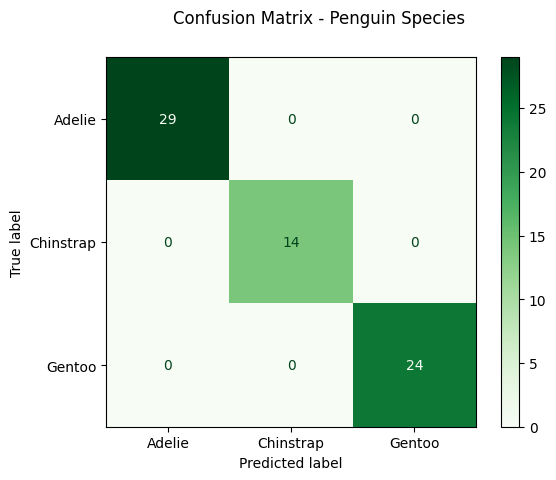

In [271]:

categorias = ["Adelie", "Chinstrap", "Gentoo"]

fig = ConfusionMatrixDisplay.from_estimator(
    svm_peng,              # your trained SVM model
    X_test,           # features from test set
    y_test,           # true labels from test set
    display_labels=categorias,
    cmap="Greens"
)

fig.figure_.suptitle("Confusion Matrix - Penguin Species")
plt.show()

<div class="alert alert-success", role="alert">
    <h1 style="font-size: 1.5em;">Parte 2 </h1>
    <h2 style="font-size: 1.5em; "><strong>Redes Neuronales</strong></h2>
</div>


<div class="alert alert-info", role="success">
    <h1 style="font-size: 2em;">Utilizando el dataset Cáncer de Seno entrene un modelo mediante una Red Neuronal con SKLearn que permita diagnosticar la enfermedad basada en datos de entrada
 </h1>
</div>


## **[16]** Cargue el dataset y elimine los NaNs de ser necesario

In [272]:
b_cancer_df = pd.read_csv('Breast_cancer_data.csv')
b_cancer_df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [273]:
b_cancer__cleandf = b_cancer_df.dropna()
print(f"Filas originales: {len(b_cancer_df)}")
print(f"Filas después de eliminar nulos(NaN): {len(b_cancer__cleandf)}")

Filas originales: 569
Filas después de eliminar nulos(NaN): 569


## **[17]** Genere el las secuencias X & Y para entrenar el modelo

In [274]:
X= b_cancer__cleandf.drop(['diagnosis'],  axis='columns')
y= b_cancer__cleandf.diagnosis

## **[18]** Aplique el escalado a los datos

In [275]:
scaler_bc = StandardScaler()
X_train = scaler_bc.fit_transform(X_train)
X_test = scaler_bc.transform(X_test)

## **[19]** Divida el dataset en conjunto de Train y Test

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **[20]** Entrene el modelo de predicción mediante MLP de SKLearn

In [277]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),  # one hidden layer with 100 neurons
    activation="relu",
    solver="adam",
    max_iter=1000,
    random_state=42
)
mlp.fit(X_train, y_train)

#Predictions
y_pred = mlp.predict(X_test)

## **[21]** Calcule el *score* de su modelo

In [278]:
train_score = mlp.score(X_train, y_train)
test_score = mlp.score(X_test, y_test)

print("Training Accuracy:", train_score)
print("Test Accuracy:", test_score)

Training Accuracy: 0.8571428571428571
Test Accuracy: 0.9210526315789473


## **[22]** Genere la matriz de confusión de los datos de test 

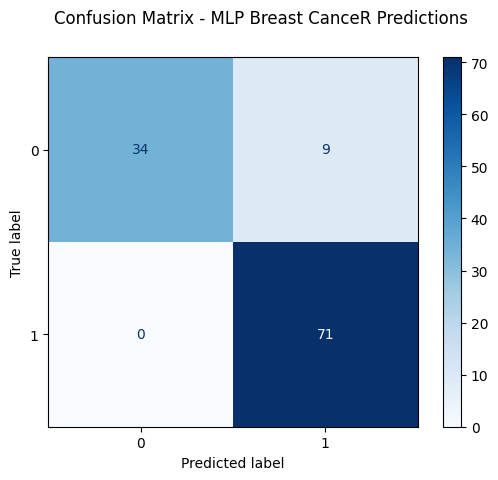

In [279]:
disp = ConfusionMatrixDisplay.from_estimator(
    mlp, X_test, y_test, cmap="Blues"
)
disp.figure_.suptitle("Confusion Matrix - MLP Breast CanceR Predictions")
plt.show()

<div class="alert alert-info", role="success">
    <h1 style="font-size: 2em;">Utilizando el dataset Cancer de Seno entrene un modelo mediante una Red Neuronal con TensorFlow que permita diagnosticar la enfermedad basada en datos de entrada
 </h1>
</div>


## **[23]** Defina el modelo de la Arquitectura del la red

In [280]:
!pip install tensorflow


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [281]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow import keras


model = Sequential()
model.add(keras.Input(shape=(5,)))
model.add(Dense(12,  kernel_initializer='uniform' , activation= 'relu' ))
model.add(Dense(8, kernel_initializer='uniform' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer='uniform' , activation= 'sigmoid' ))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 12)             │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185 (740.00 B)

 Trainable params: 185 (740.00 B)

 Non-trainable params: 0 (0.00 B)

## **[24]** Compile el modelo 

In [282]:
# Compilar modelo
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

## **[25]** Entrene su modelo de MLP

In [283]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=250, batch_size=10)

Epoch 1/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6154 - loss: 0.6875 
Epoch 2/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6110 - loss: 0.6650
Epoch 3/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7648 - loss: 0.6197
Epoch 4/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8330 - loss: 0.5309
Epoch 5/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8264 - loss: 0.4393
Epoch 6/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8440 - loss: 0.3970
Epoch 7/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8374 - loss: 0.4161
Epoch 8/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8220 - loss: 0.3886
Epoch 9/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8418 - loss: 0.3853
Epoch 10/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8396 - loss: 0.3735
Epoch 11/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8374 - loss: 0.3744
Epoch 12/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

## **[26]** Calcule el *score* de su modelo

In [284]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8947 - loss: 0.2274  
compile_metrics: 89.47%


## **[27]** Realice las predicciones con su modelo utilizando la secuencia de test 

In [285]:
prediccion = (model.predict(X_test) > 0.5).astype("int32")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


## **[28]** Genere la matriz de confusión de los datos de test 
**Obs.** En este caso para generar la matriz de confusión debe utilizar el método *from_predictions()*, utilizando la lista de predicciones y el valor real de cada instancia. 

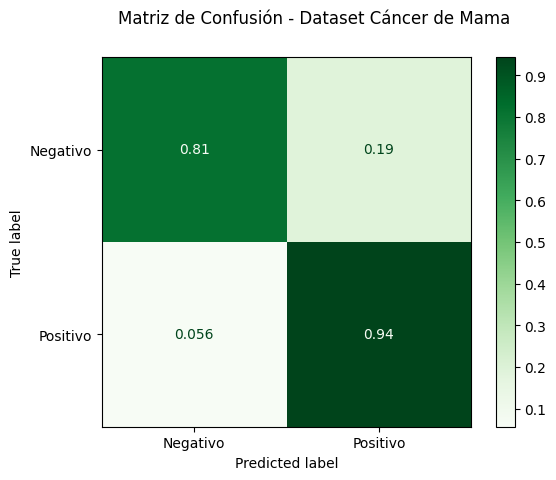

In [286]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generar matriz de confusión con las variables CORRECTAS
categorias = ['Negativo', 'Positivo']  # 0 = Negativo, 1 = Positivo

fig = ConfusionMatrixDisplay.from_predictions(
    y_test,                # Valores REALES del test set
    prediccion.flatten(),  # Predicciones (aplanar el array 2D a 1D)
    display_labels=categorias, 
    cmap="Greens", 
    normalize='true'
)  

fig.figure_.suptitle("Matriz de Confusión - Dataset Cáncer de Mama")
plt.show()

# Clasificación Multiclase
<div class="alert alert-info", role="success">
    <h1 style="font-size: 2em;">Entrene un clasificador de la isla de los pinguinos usando todas las columnas del dataset a excepción del año. Use un MLP de TensorFlow </h1>
</div>

## **[29]** Cargue el dataset y elimine los NaNs de ser necesario

In [299]:
penguins_file = penguins_clean_df.copy()
penguins_file.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [300]:
penguins_clean_df = penguins_file
print(f"Filas originales: {len(penguins_file)}")
print(f"Filas después de eliminar nulos(NaN): {len(penguins_clean_df)}") 

Filas originales: 333
Filas después de eliminar nulos(NaN): 333


In [301]:
# Verificar si existe la columna 'YEAR' y quitarla si existe
if 'YEAR' in penguins_clean_df.columns:
    penguins_clean_df = penguins_clean_df.drop('YEAR', axis=1)
    print("Columna 'YEAR' eliminada")
else:
    print("La columna 'YEAR' no existe en el dataset")

La columna 'YEAR' no existe en el dataset


## **[30]** Genere el las secuencias X & Y para entrenar el modelo

In [302]:
X = penguins_clean_df.drop('species', axis=1)
y = penguins_clean_df['species']

## **[31]** Aplique el LabelEncoder

In [303]:
label_encoder = LabelEncoder()
X['island'] = label_encoder.fit_transform(X['island'])
X['sex'] = label_encoder.fit_transform(X['sex'])


## **[32]** Aplicación de Escalado

In [304]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## **[33]** Aplique One Hot Encoding

In [305]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))
print('Ejemplo de categorías o etiquetas en formato OHE: ')
print(y[0])

Ejemplo de categorías o etiquetas en formato OHE: 
Adelie


## **[34]** Divida el dataset en conjunto de Train y Test

In [306]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded
)

## **[35]** Defina el modelo de la Arquitectura de la red

In [307]:
model = Sequential()
model.add(keras.Input(shape=(X_train.shape[1],)))  
model.add(Dense(10, activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))  # 3 neuronas para 3 especies

## **[36]** Compile el modelo 

In [308]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

print('Resumen del modelo de Red Neuronal: ')
model.summary()

Resumen del modelo de Red Neuronal: 


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fc1 (Dense)                     │ (None, 10)             │            70 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213 (852.00 B)

 Trainable params: 213 (852.00 B)

 Non-trainable params: 0 (0.00 B)

## **[37]** Entrene su modelo de MLP

In [309]:
model.fit(X_train, y_train, verbose=2, batch_size=5, epochs=200)

Epoch 1/200
54/54 - 1s - 14ms/step - accuracy: 0.3496 - loss: 1.1411
Epoch 2/200
54/54 - 0s - 2ms/step - accuracy: 0.6203 - loss: 0.8703
Epoch 3/200
54/54 - 0s - 2ms/step - accuracy: 0.8008 - loss: 0.6799
Epoch 4/200
54/54 - 0s - 2ms/step - accuracy: 0.9436 - loss: 0.4902
Epoch 5/200
54/54 - 0s - 1ms/step - accuracy: 0.9812 - loss: 0.3248
Epoch 6/200
54/54 - 0s - 2ms/step - accuracy: 0.9887 - loss: 0.2118
Epoch 7/200
54/54 - 0s - 1ms/step - accuracy: 0.9925 - loss: 0.1460
Epoch 8/200
54/54 - 0s - 2ms/step - accuracy: 0.9925 - loss: 0.1062
Epoch 9/200
54/54 - 0s - 2ms/step - accuracy: 0.9925 - loss: 0.0812
Epoch 10/200
54/54 - 0s - 2ms/step - accuracy: 0.9925 - loss: 0.0648
Epoch 11/200
54/54 - 0s - 1ms/step - accuracy: 0.9925 - loss: 0.0528
Epoch 12/200
54/54 - 0s - 1ms/step - accuracy: 0.9925 - loss: 0.0445
Epoch 13/200
54/54 - 0s - 2ms/step - accuracy: 0.9925 - loss: 0.0404
Epoch 14/200
54/54 - 0s - 2ms/step - accuracy: 0.9925 - loss: 0.0347
Epoch 15/200
54/54 - 0s - 2ms/step - accur

## **[38]** Calcule el *score* de su modelo

In [310]:
results = model.evaluate(X_test, y_test)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 2.2685e-05
Final test set loss: 0.000023
Final test set accuracy: 1.000000


## **[39]** Calcular predicciones para la secuencia de test

In [311]:
predicciones = model.predict(X_test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/stepWARNING:tensorflow:6 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001ED6EBA16C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


## **[40]** Procesar listas en OHE a listas de numéricas

In [312]:
predList=np.argmax(predicciones, axis=-1)

## **[41]** Genere la matriz de confusión de los datos de test 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


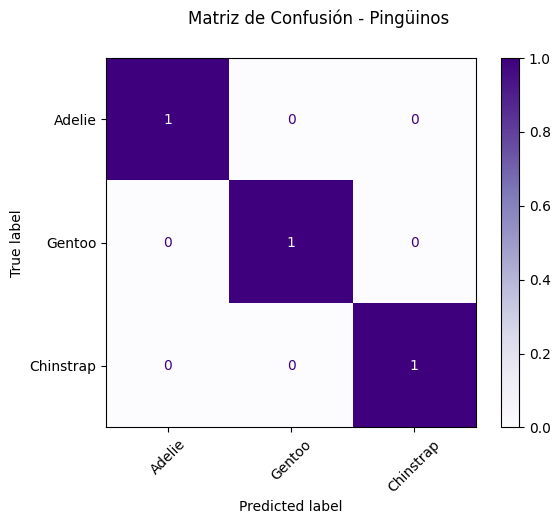

In [313]:
# Obtener predicciones
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir one-hot a labels
y_true_classes = np.argmax(y_test, axis=1)   # Convertir one-hot a labels

# Obtener nombres de las categorías (especies)
categorias = penguins_clean_df['species'].unique()

# Generar matriz de confusión
fig = ConfusionMatrixDisplay.from_predictions(
    y_true_classes, 
    y_pred_classes,
    display_labels=categorias, 
    cmap="Purples", 
    normalize='true'
) 
fig.figure_.suptitle("Matriz de Confusión - Pingüinos")
plt.xticks(rotation=45)
plt.show()

# Redes Neuronales Recurrentes
<div class="alert alert-info", role="success">
    <h1 style="font-size: 2em;">Utilización de Series temporales </h1>
</div>

## **[42]** Utilizando el Codigo presentado en el ejemplo modique el tamaño de la secuencia y compare los resultados
Obs. Puede añadir a esta sección las celdas de código que necesite.

In [316]:
datosDT = pd.read_csv('daily-minimum-temperatures-in-me.csv')

# Extraer la columna con la serie
datosTempo = datosDT.iloc[:,1]

# Asegurar el tipo de dato flotante 
datosTempo = pd.to_numeric(datosTempo, errors='coerce', downcast='float')
datosTempo = datosTempo.dropna()  # Eliminar valores NaN si los hay

In [317]:
# Crear secuencias de entrada y etiquetas
sequence_length = 7  # Cambiado de 10 a 7

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

X, y = create_sequences(np.array(datosTempo), sequence_length)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Añadir dimensión para LSTM

In [318]:
y

array([17.4, 21.8, 20. , ..., 13.5, 15.7, 13. ], dtype=float32)

In [319]:
# Dividir en entrenamiento y prueba
split = int(len(X) * 0.75)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [320]:
from tensorflow.keras.layers import LSTM, Dense
# Construcción del modelo LSTM
model = Sequential([
    keras.Input(shape=(sequence_length,1)),
    LSTM(50, activation='relu', return_sequences=True),
    LSTM(20, activation='relu'),
    Dense(48),
    Dense(1)
])

model.summary()
model.compile(optimizer='adam', loss='mse')

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 20)             │         5,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 48)             │         1,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,137 (66.94 KB)

 Trainable params: 17,137 (66.94 KB)

 Non-trainable params: 0 (0.00 B)

In [321]:
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint


# Configurar checkpoints
checkpoint = ModelCheckpoint('model_checkpoint_{epoch}.keras', save_best_only=True, monitor='val_loss', mode='min')

In [322]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 25.6885 - val_loss: 6.6979
Epoch 2/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.0809 - val_loss: 5.8354
Epoch 3/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.5707 - val_loss: 5.6263
Epoch 4/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.3359 - val_loss: 5.6063
Epoch 5/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.3046 - val_loss: 5.8233
Epoch 6/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.2197 - val_loss: 5.6468
Epoch 7/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.2184 - val_loss: 5.5960
Epoch 8/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.1768 - val_loss: 5.6988
Epoch 9/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.1570 - val_loss: 5.5190
Epoch 10/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.2021 - val_loss: 5.6776
Epoch 11/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.1034 - val_loss: 5.7847
Epoch 12/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.1731 - val_l

In [323]:
# Predicción sobre el conjunto de prueba
y_pred = model.predict(X_test, batch_size=16)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [324]:
from sklearn.metrics import mean_squared_error
# Calcular métrica de evaluación (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio (MSE) con sequence_length={sequence_length}: {mse}')

Error cuadrático medio (MSE) con sequence_length=7: 5.722267150878906


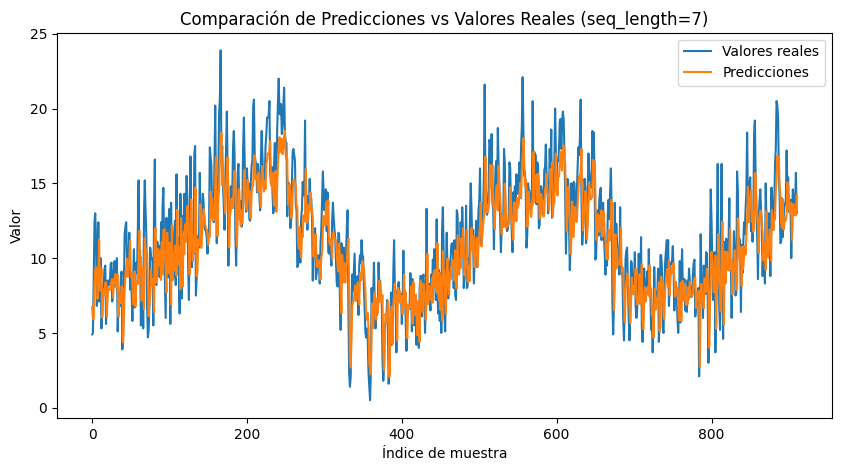

In [325]:
# Graficar predicciones vs valores reales
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Valores reales')
plt.plot(y_pred, label='Predicciones')
plt.legend()
plt.xlabel('Índice de muestra')
plt.ylabel('Valor')
plt.title(f'Comparación de Predicciones vs Valores Reales (seq_length={sequence_length})')
plt.show()

## **[43]** Utilizando como modelo el modelo LSTM del ejemplo, seleccione un dataset de la carpeta suministrada y entrene un nuevo modelo, modificando la arquitectura de la red. 
Obs. Puede añadir a esta sección las celdas de código que necesite.

In [327]:
datosEP = pd.read_csv('Electric_Production.csv')
datosEP.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [328]:
# Extraer la columna con la serie (IPG2211A2N)
datosTempo = datosEP.iloc[:, 1]  # Segunda columna con los valores de producción

# Asegurar el tipo de dato flotante 
datosTempo = pd.to_numeric(datosTempo, errors='coerce', downcast='float')
datosTempo = datosTempo.dropna()  # Eliminar valores NaN si los hay


In [329]:
# Crear secuencias de entrada y etiquetas
sequence_length = 7  # Tamaño de secuencia

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

X, y = create_sequences(np.array(datosTempo), sequence_length)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Añadir dimensión para LSTM


In [330]:
# Dividir en entrenamiento y prueba
split = int(len(X) * 0.75)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [331]:
# Construcción del modelo LSTM
model = Sequential([
    keras.Input(shape=(sequence_length,1)),
    LSTM(50, activation='relu', return_sequences=True),
    LSTM(20, activation='relu'),
    Dense(48),
    Dense(1)
])

In [332]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 7, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 20)             │         5,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 48)             │         1,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,137 (66.94 KB)

 Trainable params: 17,137 (66.94 KB)

 Non-trainable params: 0 (0.00 B)

In [333]:
model.compile(optimizer='adam', loss='mse')

In [334]:
# Configurar checkpoints
checkpoint = ModelCheckpoint('model_checkpoint_{epoch}.keras', save_best_only=True, monitor='val_loss', mode='min')

In [335]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 1477.7307 - val_loss: 674.8791
Epoch 2/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 228.3339 - val_loss: 140.7768
Epoch 3/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 90.1402 - val_loss: 94.6450
Epoch 4/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 50.4465 - val_loss: 64.4978
Epoch 5/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 40.9837 - val_loss: 60.8253
Epoch 6/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 32.6881 - val_loss: 49.4802
Epoch 7/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 30.4342 - val_loss: 44.1725
Epoch 8/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 27.1383 - val_loss: 43.2221
Epoch 9/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 26.4200 - val_loss: 41.4606
Epoch 10/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 26.1455 - val_loss: 40.1864
Epoch 11/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 25.7040 - val_loss: 38.8016
Epoch 12/40
10/10 ━━━━━━━━━━━━━━━━━━

In [336]:
# Predicción sobre el conjunto de prueba
y_pred = model.predict(X_test, batch_size=16)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [337]:
# Calcular métrica de evaluación (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')

Error cuadrático medio (MSE): 32.53266143798828


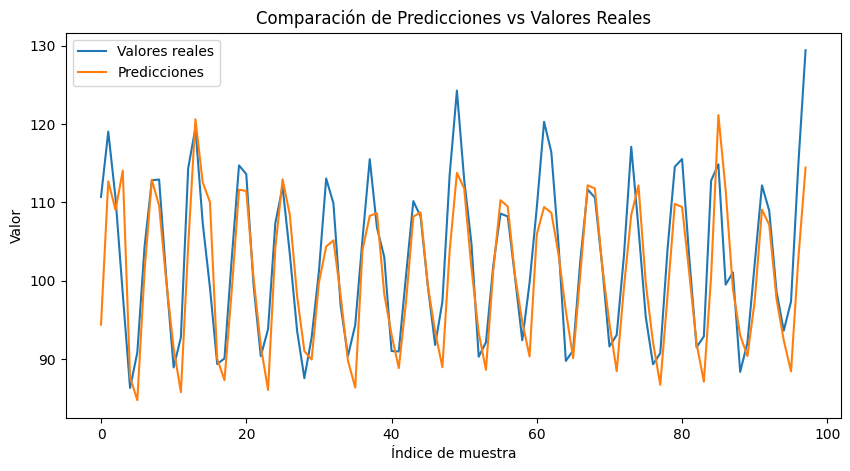

In [338]:
# Graficar predicciones vs valores reales
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Valores reales')
plt.plot(y_pred, label='Predicciones')
plt.legend()
plt.xlabel('Índice de muestra')
plt.ylabel('Valor')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.show()


## **[44]** Conclusiones 